# Testing Jupiter
This is a basic testing file

In [27]:
import pandas as pd
df = pd.read_csv("health_v1.csv", sep=";", na_values=["", " "], decimal=",")
df

,ID,Weight,Smoking,Exercise,Cholesterol,Income,Happiness,BirthYear,Sex
0,1,75.0,0.0,3.0,5.8,3230.0,59.0,1964.0,1
1,2,70.0,0.0,6.0,5.9,1420.0,43.0,1952.0,1
2,3,76.0,0.0,6.0,6.0,4930.0,74.0,1951.0,1
3,4,62.0,0.0,8.0,4.7,2970.0,58.0,1959.0,1
4,5,44.0,0.0,8.0,4.3,4780.0,64.0,1925.0,1
...,...,...,...,...,...,...,...,...,...
995,996,106.0,1.0,1.0,9.4,0.0,0.0,1919.0,2
996,997,77.0,1.0,4.0,6.6,2990.0,45.0,1971.0,2
997,998,71.0,0.0,8.0,4.5,4840.0,74.0,1935.0,2
998,999,107.0,1.0,2.0,8.4,2030.0,38.0,1929.0,2


In [18]:
df.dtypes

ID               int64
Weight         float64
Smoking        float64
Exercise       float64
Cholesterol    float64
Income         float64
Happiness      float64
BirthYear      float64
Sex             object
dtype: object

In [21]:
df['Exercise'] = df['Exercise'].astype(int)
df['Income'] = df['Income'].astype(int)
df['BirthYear'] = df['BirthYear'].astype(int)
df['Sex'] = pd.Categorical(df['Sex'])

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [23]:
df['Sex'] = pd.Categorical(df['Sex'])

In [24]:
df['Sex'] = df['Sex'].astype(str)
df['Sex'] = df['Sex'].replace({'Male': '1', 'Female': '2'})
df['Sex'] = df['Sex'].astype('category')

In [25]:
df.describe(include='all')

,ID,Weight,Smoking,Exercise,Cholesterol,Income,Happiness,BirthYear,Sex
count,1000.000000,999.000000,999.000000,998.000000,1000.00000,997.000000,999.000000,999.000000,1000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,523
mean,500.500000,79.717718,0.232232,5.092184,5.72750,3069.829488,51.171171,1954.111111,NaN
std,288.819436,25.252719,0.422468,2.030736,1.39649,1264.497563,17.511569,21.443328,NaN
min,1.000000,8.000000,0.000000,0.000000,-7.50000,0.000000,0.000000,1879.000000,NaN
25%,250.750000,70.000000,0.000000,4.000000,4.87500,2220.000000,39.000000,1939.000000,NaN
50%,500.500000,80.000000,0.000000,5.000000,5.80000,3140.000000,50.000000,1954.000000,NaN
75%,750.250000,88.000000,0.000000,6.000000,6.60000,3890.000000,63.000000,1969.000000,NaN


In [30]:
import matplotlib.pyplot as plt

def plot_data(df):
    plt.figure(figsize=(20, 10))
    for i, col in enumerate(df.select_dtypes(include=['int', 'float'])):
        plt.subplot(3, 3, i + 1)
        df[col].plot(kind='hist', title=col)
        plt.xlabel(col)

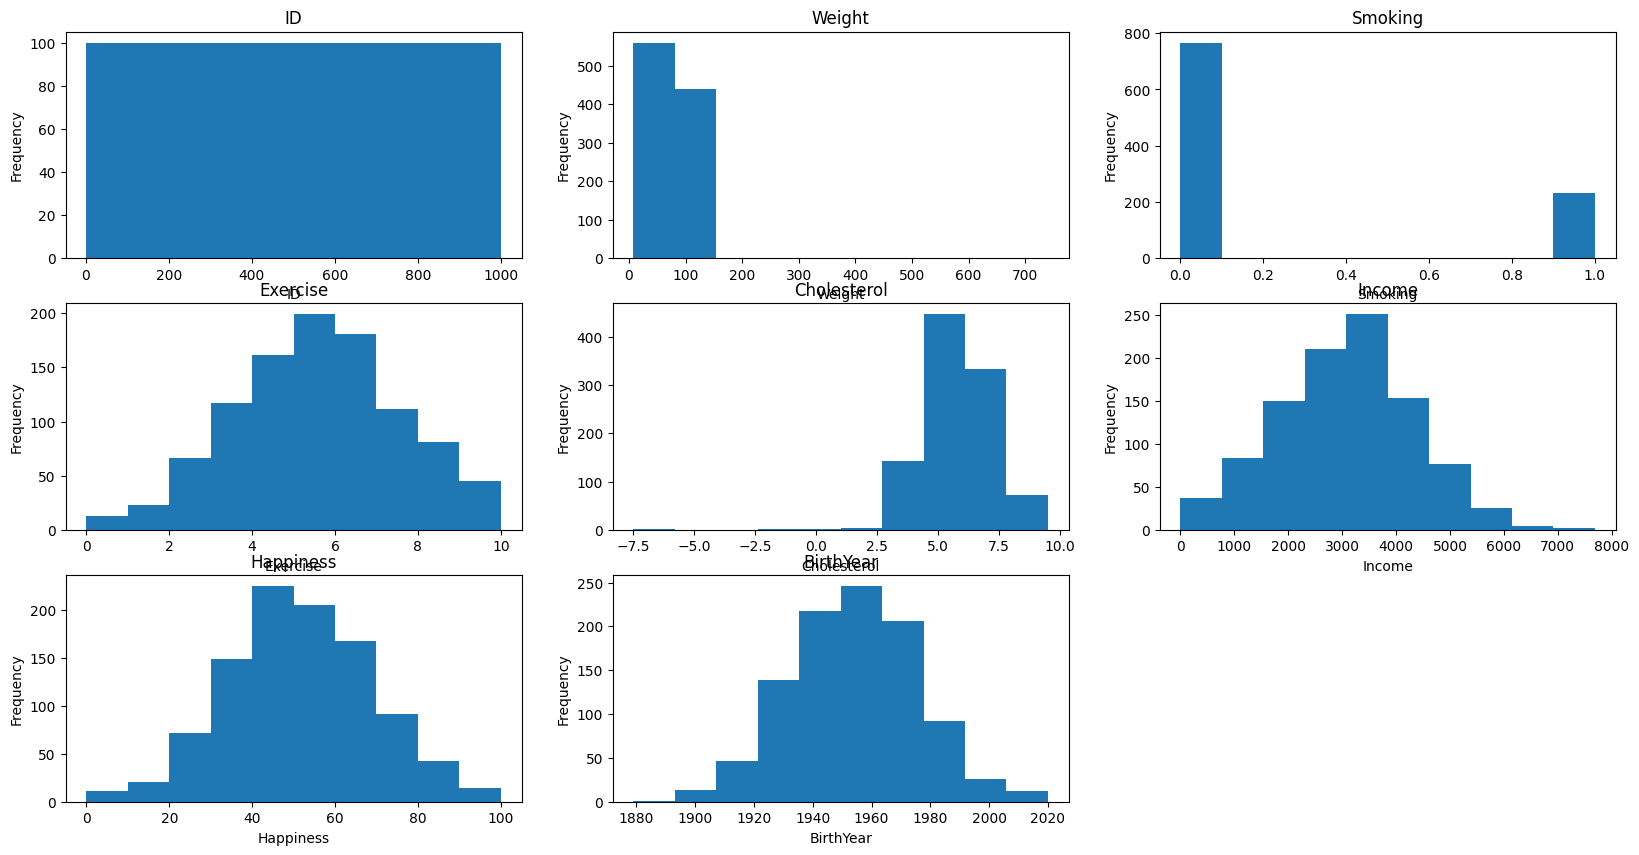

In [31]:
plot_data(df)

In [32]:
df = df[(df['BirthYear'] <= 2006) & (df['BirthYear'] >= 1925)]
df.describe(include='all')

,ID,Weight,Smoking,Exercise,Cholesterol,Income,Happiness,BirthYear,Sex
count,916.000000,915.000000,915.000000,914.000000,916.000000,913.000000,915.000000,916.000000,916
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,455
mean,499.403930,80.018579,0.231694,5.086433,5.697380,3055.147864,51.398907,1956.545852,NaN
std,287.480346,26.016589,0.422145,2.028864,1.299682,1252.155512,17.507904,17.987278,NaN
min,1.000000,8.000000,0.000000,0.000000,-1.900000,0.000000,0.000000,1925.000000,NaN
25%,253.500000,70.000000,0.000000,4.000000,4.800000,2220.000000,40.000000,1942.000000,NaN
50%,502.500000,80.000000,0.000000,5.000000,5.700000,3110.000000,51.000000,1956.000000,NaN
75%,746.250000,88.000000,0.000000,6.000000,6.600000,3890.000000,63.000000,1970.000000,NaN
